# Return on Campaign Transparency

A quick aggregation of the Money in Politics and Swiss Elections 2023 data.

Sources:

- [moneyinpolitics.ch](https://moneyinpolitics.ch/data)
- [opendata.swiss](https://opendata.swiss/de/dataset/eidg-wahlen-2023)

In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
# Download and cache results of the elections
f_parties = 'sd-t-17.02-NRW2023-parteien-appendix.csv'
if not os.path.exists(f_parties):
    import requests
    url = 'https://ogd-static.voteinfo-app.ch/v4/ogd/sd-t-17.02-NRW2023-parteien-appendix.csv'
    response = requests.get(url)
    with open(f_parties, 'wb') as f:
        f.write(response.content)

In [6]:
# Read in the election results
df_elect = pd.read_csv(f_parties, header=0, sep=';')
# Read in a pre-aggregated summary of the moneyinpolitics data
df_money = pd.read_csv('moneyinpolitics-summary.csv', header=0, sep=',')

'Results: %d / Money: %d' % (len(df_elect), len(df_money))

'Results: 21548 / Money: 14'

In [7]:
# List of leading national parties as per BFS data
parties_2023 = """FDP SP SVP EVP CSP PdA/Sol. FGA GRÜNE SD EDU Lega GLP MCR Mitte Others""".split(' ')
parties_2023

['FDP',
 'SP',
 'SVP',
 'EVP',
 'CSP',
 'PdA/Sol.',
 'FGA',
 'GRÜNE',
 'SD',
 'EDU',
 'Lega',
 'GLP',
 'MCR',
 'Mitte',
 'Others']

In [8]:
# Sum the party values
combined = {}
for p in parties_2023:
    this_p = df_elect[df_elect['partei_bezeichnung_de'] == p]
    this_m = df_money[df_money['name'] == p]
    combined[p] = {
        'stimmen': int(this_p['stimmen_partei'].sum()),
        'differenz': int(this_p['differenz_stimmen_partei'].sum()),
        'kandidierende': int(this_p['anzahl_kandidierende'].sum()),
        'gewaehlte': int(this_p['anzahl_gewaehlte'].sum()),
        'profitiert': int(this_m['profitiert'].sum()),
        'fuehrt': int(this_m['fuehrt'].sum()),
    }
df_combined = pd.DataFrame(combined).T
df_combined.head()

,stimmen,differenz,kandidierende,gewaehlte,profitiert,fuehrt
FDP,10528584,-149636,1290,55,14536881,11836745
SP,16141626,3101720,1406,82,8534985,7919449
SVP,22645070,2669838,1238,124,13749507,11203356
EVP,2097870,-44274,732,4,1564136,1181000
CSP,33052,-34038,14,0,0,0


In [9]:
def trim_dataframe(df, col):
    return df[~((df[col] == 0) | (pd.isnull(df[col])))]

In [10]:
# Create a simple indicator of effective votes
df_combined['ROP'] = df_combined['profitiert'] / df_combined['stimmen']
df_combined['ROF'] = df_combined['fuehrt'] / df_combined['stimmen']
df_combined['ROCT'] = 100 * (df_combined['ROP'] + df_combined['ROF'])
df_sorted = trim_dataframe(df_combined, 'ROCT').sort_values('ROCT', ascending=True)

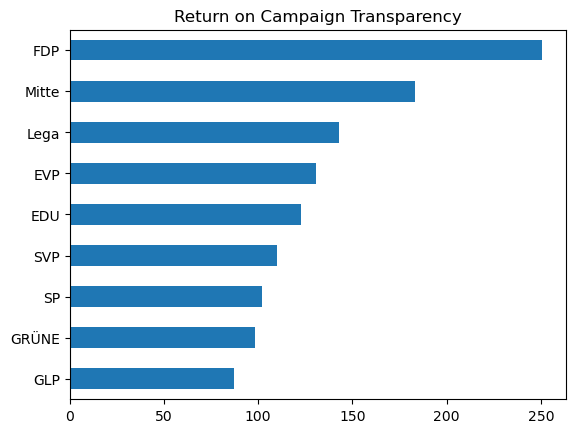

In [11]:
# Generate a matplot
df_sorted.plot(title='Return on Campaign Transparency', kind='barh', y=['ROCT'], legend=False)
plt.savefig('chart.png')